[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\121731\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Similarity between 'car' and 'engine': 0.9973494
Most similar to 'baseball': [('by', 0.9994316697120667), ('in', 0.9993903636932373), ('of', 0.9993772506713867), ('$', 0.99934983253479), ('is', 0.9993479251861572), ('out', 0.9993461966514587), ('my', 0.9993327260017395), ('for', 0.9993249773979187), ('(', 0.9993225932121277), ('?', 0.9993177652359009)]

Tematy LDA:
Temat 0: 0.028*"." + 0.022*"the" + 0.018*"," + 0.015*"a" + 0.011*"and" + 0.010*"0" + 0.009*"to" + 0.009*"in" + 0.009*"of" + 0.008*"for"
Temat 1: 0.118*"*" + 0.022*"|" + 0.021*"." + 0.016*"the" + 0.015*"--" + 0.010*"," + 0.009*"to" + 0.006*"of" + 0.006*"is" + 0.006*")"
Temat 2: 0.012*"the" + 0.006*"we" + 0.006*"side" + 0.005*"." + 0.005*")" + 0.005*"was" + 0.004*"tires" + 0.004*"(" + 0.003*"left" + 0.003*"right"
Temat 3: 0.044*"," + 0.044*"the" + 0.042*"." + 0.032*"--" + 0.018*"i" + 0.018*"a" + 0.017*"to" + 0.016*"and" + 0.014*"of" + 0.013*"in"
Temat 4: 0.029*"," + 0.024*"the" + 0.020*"." + 0.014*"a" + 0.012*"i" + 0.011*"he" 

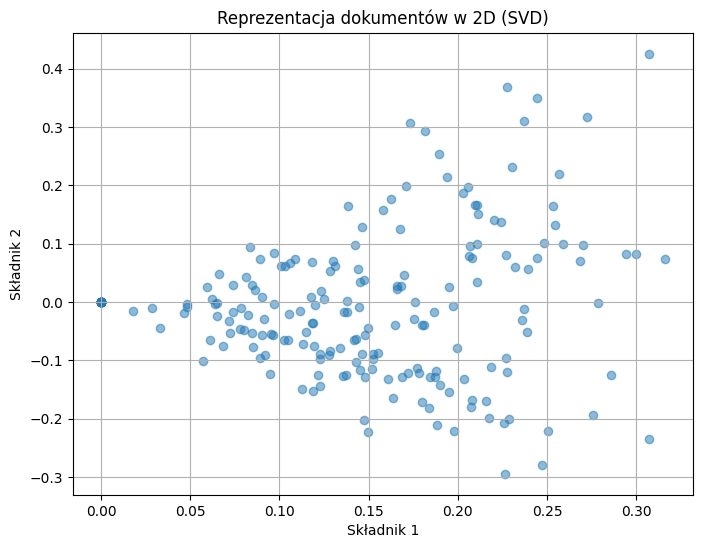

In [6]:
import nltk
nltk.download('punkt_tab')

import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec, LdaModel
from gensim.corpora.dictionary import Dictionary

data = fetch_20newsgroups(subset='train', categories=['rec.autos', 'rec.sport.baseball'], remove=('headers', 'footers', 'quotes'))
texts = data.data[:200]  # ograniczenie, by przyspieszyć

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)

sentences = [word_tokenize(doc.lower()) for doc in texts]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2)

print("Similarity between 'car' and 'engine':", w2v_model.wv.similarity('car', 'engine'))
print("Most similar to 'baseball':", w2v_model.wv.most_similar('baseball'))

sentences_filtered = [s for s in sentences if len(s) > 5]
dictionary = Dictionary(sentences_filtered)
corpus = [dictionary.doc2bow(s) for s in sentences_filtered]
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

print("\nTematy LDA:")
for idx, topic in lda_model.print_topics():
    print(f"Temat {idx}: {topic}")

svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(tfidf_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.5)
plt.title("Reprezentacja dokumentów w 2D (SVD)")
plt.xlabel("Składnik 1")
plt.ylabel("Składnik 2")
plt.grid(True)
plt.show()
